# Вычисления к работе 2.1.2

In [1]:
import pandas as pd
import numpy as np

In [2]:
t1 = np.transpose(np.array(pd.read_csv('t0-5s.csv', header=0, sep=';')))    # t < 0.5s
t2 = np.transpose(np.array(pd.read_csv('t1s.csv', header=0, sep=';')))      # 0.5s < t < 1s
t3 = np.transpose(np.array(pd.read_csv('t1-5s.csv', header=0, sep=';')))    # 1.5s < t < 5s

print(t1)
print(t2)
print(t3)
print()

ht_data = []
for i in range(1, 7):
    file_name = 'h_t' + str(i) + '.csv'
    table = np.array(pd.read_csv(file_name, header=0, sep=';'))
    for line in table:
        if type(line[1]) != float:
            line[1] = 33.6 - line[0]
        #print(line)
    ht_data.append(np.transpose(np.array(table)))

for table in ht_data:
    #table = np.transpose(table)
    print(table)

[[21.6 21.5 21.3 21.2 21.3]
 [12.  12.  12.3 12.4 12.3]
 [18.  18.3 17.9 18.6 18.8]
 [15.5 15.2 15.6 14.9 14.7]]
[[21.4 21.3 21.3 21.3 21.3 21.2 21.2]
 [12.2 12.3 12.3 12.3 12.2 12.4 12.4]
 [17.7 17.7 17.8 17.7 17.7 17.6 17.6]
 [15.8 15.8 15.7 15.8 15.8 15.9 15.9]]
[[21.3 21.5 21.5 21.4 21.2]
 [12.3 12.  12.1 12.1 12.3]
 [17.6 17.7 17.7 17.6 17.5]
 [15.8 15.8 15.8 15.8 15.9]]

[[ 22.   21.6  21.5  21.4]
 [ 11.6  12.   12.1  12.2]
 [  0.   50.   93.  193. ]]
[[ 22.   21.9  21.8  21.7  21.6  21.5  21.4  21.3]
 [ 11.6  11.7  11.8  11.9  12.   12.1  12.2  12.3]
 [  0.   10.   15.   23.   27.   49.   65.  184. ]]
[[ 22.   21.9  21.8  21.7  21.6]
 [ 11.6  11.7  11.8  11.9  12. ]
 [  0.   30.   48.   94.  258. ]]
[[ 22.   21.9  21.8  21.7  21.6  21.5]
 [ 11.6  11.7  11.8  11.9  12.   12.1]
 [  0.    7.   19.   37.   67.  184. ]]
[[ 22.   21.9  21.8  21.7  21.6  21.5  21.4  21.3]
 [ 11.6  11.7  11.8  11.9  12.   12.1  12.2  12.3]
 [  8.   12.   17.   27.   39.   55.   85.  182. ]]
[[ 22.   21.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

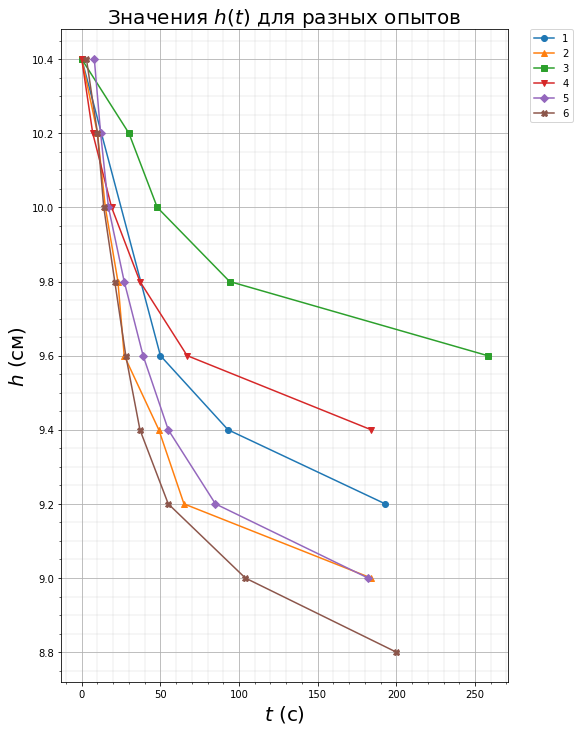

In [5]:
markers = ['o', '^', 's', 'v', 'D', 'X']
plt.figure(figsize = (8, 12))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.title('Значения $h(t)$ для разных опытов', fontsize=20) # о нифига тут так можно))
plt.xlabel('$t$ (с)', fontsize=20)
plt.ylabel('$h$ (см)', fontsize=20)
for i in range(6):
    plt.plot(ht_data[i][2], ht_data[i][0] - ht_data[i][1], marker=markers[i], label=i+1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Из графика видно, что время установления равновесия $\Delta t_T$ составляет около двух минут.

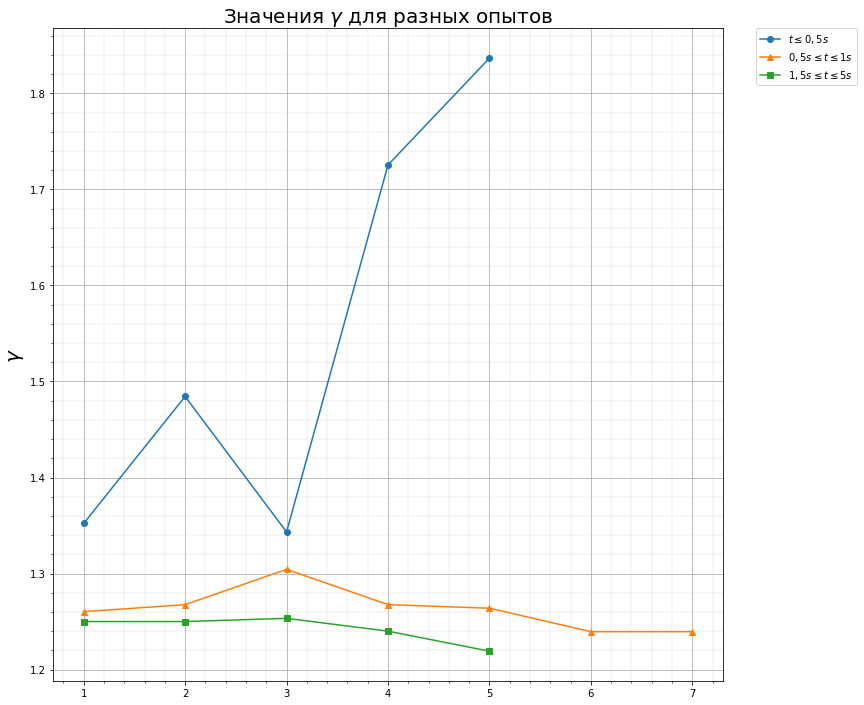

In [6]:
plt.figure(figsize = (12, 12))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.title('Значения $\gamma$ для разных опытов', fontsize=20)
#plt.xlabel('$t$ (с)', fontsize=20)
plt.ylabel('$\gamma$', fontsize=20)
plt.plot(range(1, 6), (t1[0] - t1[1]) / (t1[0] - t1[1] - t1[2] + t1[3]), marker='o', label='$t\leq 0,5s$')
plt.plot(range(1, 8), (t2[0] - t2[1]) / (t2[0] - t2[1] - t2[2] + t2[3]), marker='^', label='$0,5s\leq t\leq 1s$')
plt.plot(range(1, 6), (t3[0] - t3[1]) / (t3[0] - t3[1] - t3[2] + t3[3]), marker='s', label='$1,5s\leq t\leq 5s$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Рассмотрим средние значения $\gamma$ для трех характерных интервалов времени.

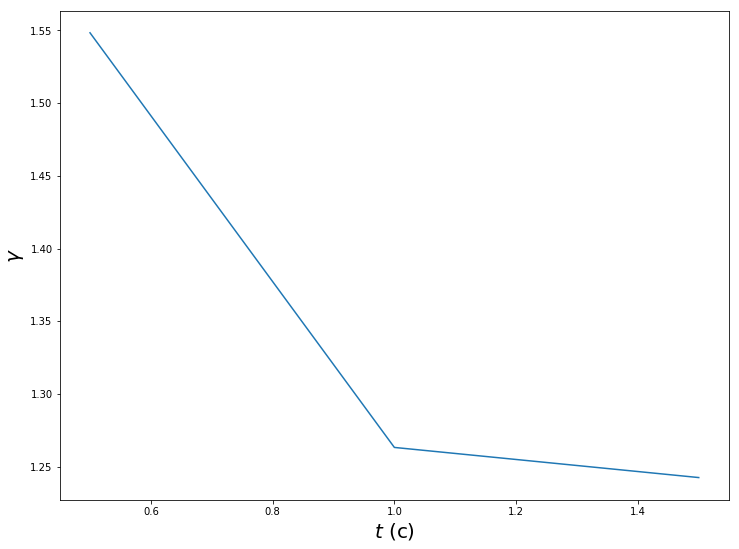

In [7]:
def avg(a):
    return sum(a) / len(a)

gamma = [avg((t1[0] - t1[1]) / (t1[0] - t1[1] - t1[2] + t1[3])),
         avg((t2[0] - t2[1]) / (t2[0] - t2[1] - t2[2] + t2[3])),
         avg((t3[0] - t3[1]) / (t3[0] - t3[1] - t3[2] + t3[3]))]

t = [0.5, 1., 1.5]

plt.figure(figsize = (12, 9))
plt.xlabel('$t$ (с)', fontsize=20)
plt.ylabel('$\gamma$', fontsize=20)
plt.plot(t, gamma)
plt.show()

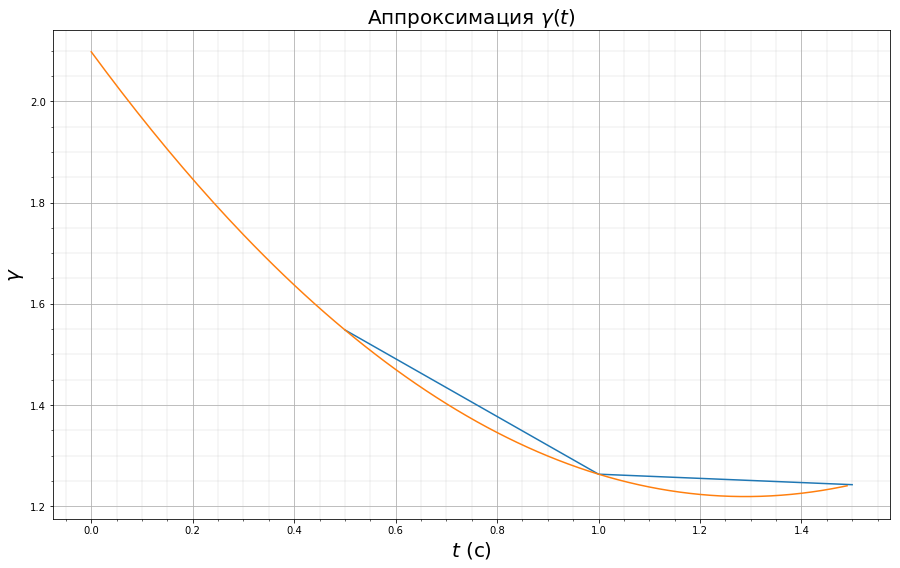

[2.09802, -1.36368, 0.52889]
1.9669372402002923


In [8]:
from scipy import linalg

def approx(a, b, step): 
    x = [i for i in a[::step]]
    y = [i for i in b[::step]]
    n = len(x)
    x = np.array([[i ** j for j in range(n)] for i in x])
    return linalg.solve(x, y)

a = approx(t, gamma, 1)

def f(x):
    n = len(a)
    s = 0.
    for i in range(n):
        s += a[i] * x ** i
    return s

x = np.arange(0, 1.5, 0.01)
y = [f(i) for i in x]

plt.figure(figsize = (15, 9))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.title('Аппроксимация $\gamma(t)$', fontsize=20)
plt.plot(t, gamma)
plt.plot(x, y)
plt.xlabel('$t$ (с)', fontsize=20)
plt.ylabel('$\gamma$', fontsize=20)
plt.show()

print([round(i, 5) for i in a])
gamma0 = f(0.1)
print(gamma0)

$$ \gamma(t) \approx 2,1 -1,36t + 0,53t^2 $$

$$ \gamma(0,1) \approx 1,97 $$

$$ C_p = \frac{\gamma R}{\gamma-1} \approx 16,9 \hspace{5pt} \frac{\text{Дж}}{\text{моль}\cdot\text{К}} = 383,8 \hspace{5pt} \frac{\text{Дж}}{\text{кг}\cdot\text{К}} $$

Но если исключить точки 2, 4 и 5 на синем графике, то получится

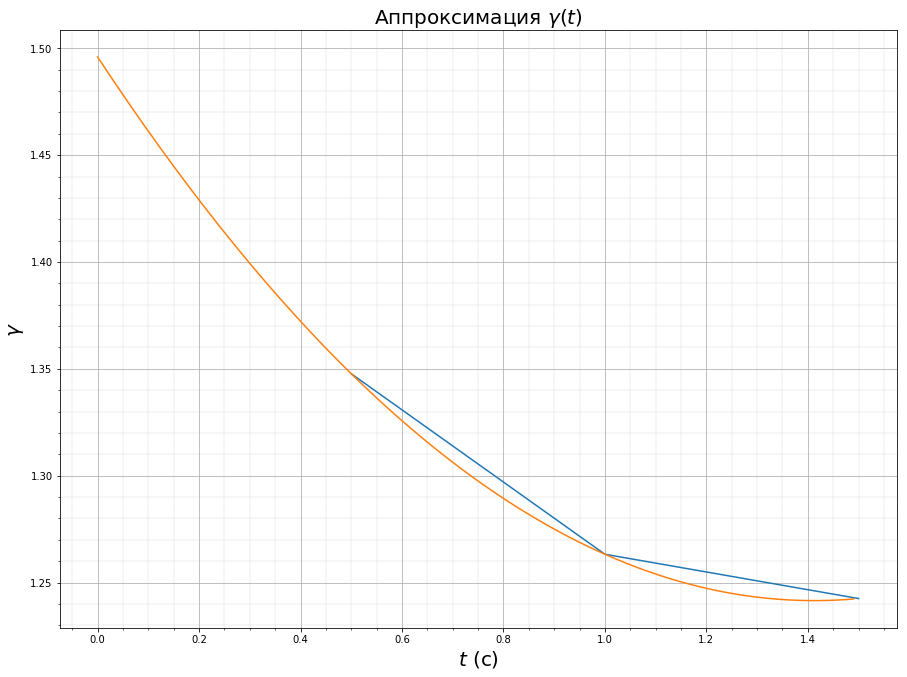

[1.49591, -0.36017, 0.12749]
1.46117046682077


In [14]:
gamma[0] = ((t1[0][0] - t1[1][0]) / (t1[0][0] - t1[1][0] - t1[2][0] + t1[3][0]) + 
           (t1[0][2] - t1[1][2]) / (t1[0][2] - t1[1][2] - t1[2][2] + t1[3][2])) / 2

a = approx(t, gamma, 1)

x = np.arange(0, 1.5, 0.01)
y = [f(i) for i in x]

plt.figure(figsize = (15, 11))
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.title('Аппроксимация $\gamma(t)$', fontsize=20)
plt.plot(t, gamma)
plt.plot(x, y)
plt.xlabel('$t$ (с)', fontsize=20)
plt.ylabel('$\gamma$', fontsize=20)
plt.show()

print([round(i, 5) for i in a])
gamma0 = f(0.1)
print(gamma0)

$$ \gamma(t) \approx 1,5 -0,36t + 0,13t^2 $$

$$ \gamma(0,1) \approx 1,46 $$

$$ C_p = \frac{\gamma R}{\gamma-1} \approx 26,4 \hspace{5pt} \frac{\text{Дж}}{\text{моль}\cdot\text{К}} = 599,7 \hspace{5pt} \frac{\text{Дж}}{\text{кг}\cdot\text{К}} $$

### Оценка погрешности

$\sigma_t = 0,5$ с, $\sigma_h = 1$ см,

$$ \frac{\sigma_t}{t} = \frac{0,5}{5} = 0,1 $$

$$ \frac{\sigma_h}{h} = \frac{1}{8} = 0,125 $$

$$ \frac{\sigma_\gamma}{\gamma} = \sqrt{\left(\frac{\sigma_t}{t}\right)^2 + \left(\frac{\sigma_h}{h}\right)^2} \approx 0,16 $$